# **Credit Card Fraud Detection**

**by: Stefanus Felix Wigna Sunarto**

In [19]:
# 1. Import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Data Splitting
from sklearn.model_selection import train_test_split

# 3. Preprocessing
# columnn transformer
from sklearn.compose import ColumnTransformer
# pipeline
from sklearn.pipeline import Pipeline

# 4. Missing Values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# 5. Scaling --> Numerical
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# 6. Encoding --> Categorical
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder

# 7. Cross Validation
from sklearn.model_selection import cross_val_score

# 8. Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, KFold

# 9. Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# 10. Metrics Evaluation: Accuracy
from sklearn.metrics import accuracy_score, recall_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

**Dataset 'https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud'**

**Features Description**
</br>
Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

![confusion matrix](https://miro.medium.com/v2/resize:fit:1400/1*PO5SCO2fXC8exrHufaATog.png)

## **Business Problem**
The bank aims to mitigate the risk of fraudulent transactions in credit card-based transaction services.

Problem:
</br>
Sometimes, the bank fails to detect transactions classified as fraudulent transactions.

FP (False Positives):
- Machine Learning predicts a customer is committing fraud, but in reality, they are not committing fraud.
- Loss of commission from transactions made by the customer.
- Loss of potential new customers.
- We assume the bank will incur a loss of 10 million Indonesian Rupiah.

FN (False Negatives):
- Machine Learning predicts a customer is not committing fraud, but in reality, they are committing fraud.
- Financial loss, loss of customer trust, damage to the bank's reputation, investigation costs.
- We assume the bank will incur a loss of 100 million Indonesian Rupiah.

Because false negatives have ten times worse effects than false positives, we will focus on minimizing false negatives using the recall scoring method.

# **1. Load Dataset**

In [20]:
df = pd.read_csv("/Users/stefanusfelix/Documents/Dataset/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [22]:
df.duplicated().sum()

1081

In [23]:
df.drop_duplicates(inplace = True)

In [24]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [25]:
df.shape

(283726, 31)

# **2. EDA**

In [26]:
df["Class"].unique()

array([0, 1])

In [72]:
class_0_pct = len(df[df["Class"] == 0]) / len(df)
class_0_pct

0.9983328986416472

In [73]:
class_1_pct = len(df[df["Class"] == 1]) / len(df)
class_1_pct

0.001667101358352777

In [27]:
df_feature = df.drop(columns = "Class")

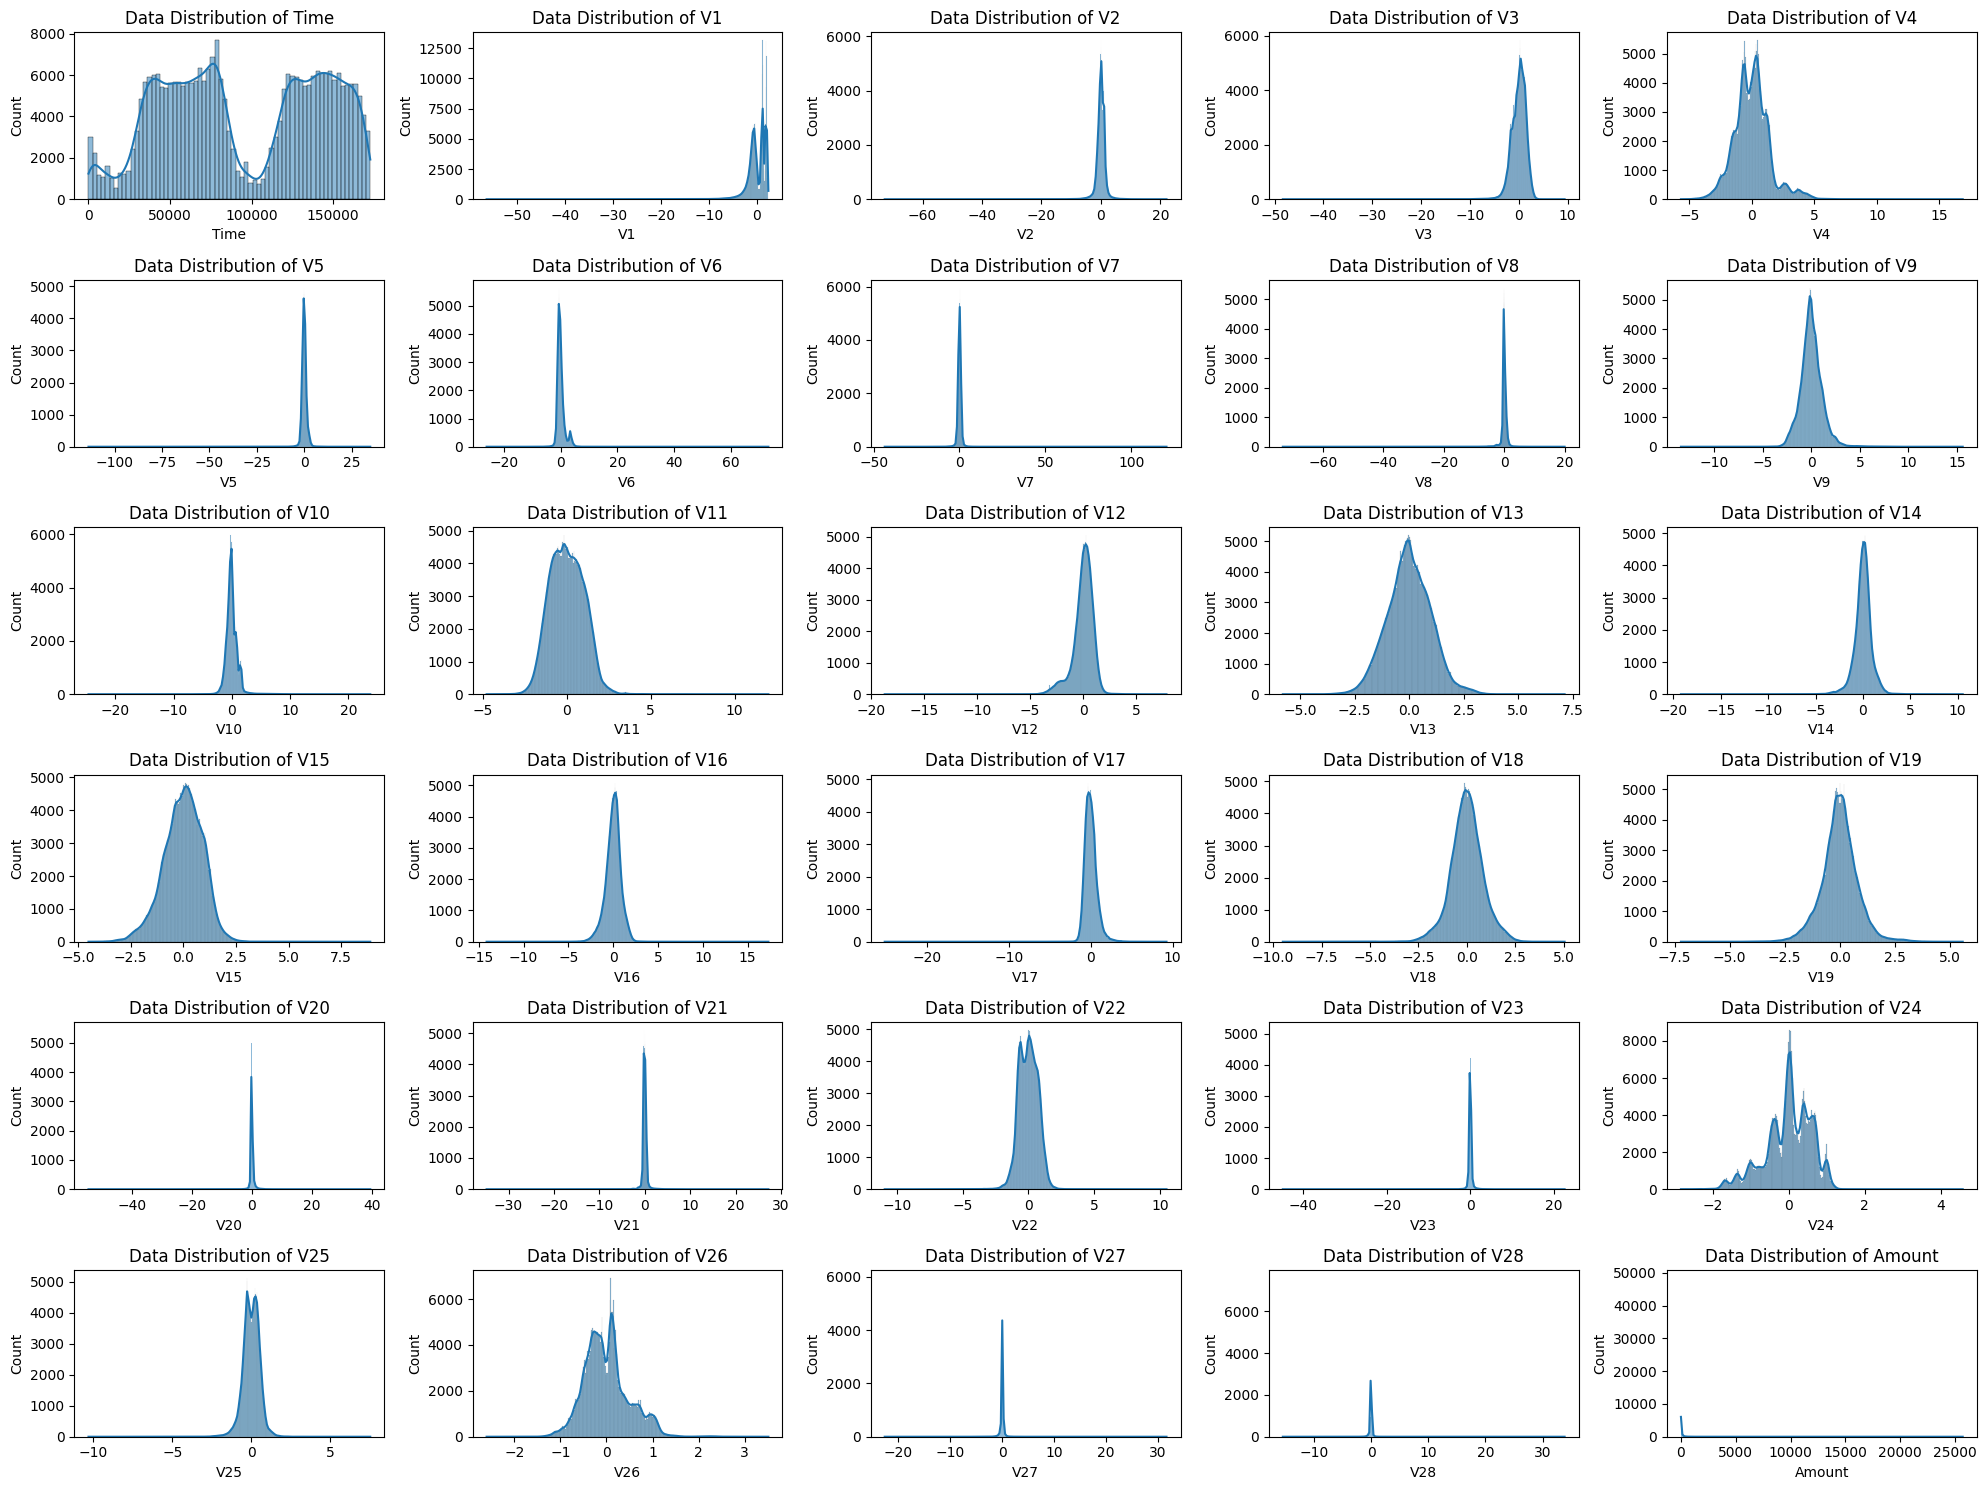

In [28]:
plt.figure(figsize=(20,15))
plotnumber = 1 

for i in df_feature:
    plt.subplot(6,5,plotnumber)

    sns.histplot(data = df_feature, x = i, kde = True)

    plt.xlabel(i)
    plt.title(f"Data Distribution of {i}")
    plotnumber += 1

plt.tight_layout()

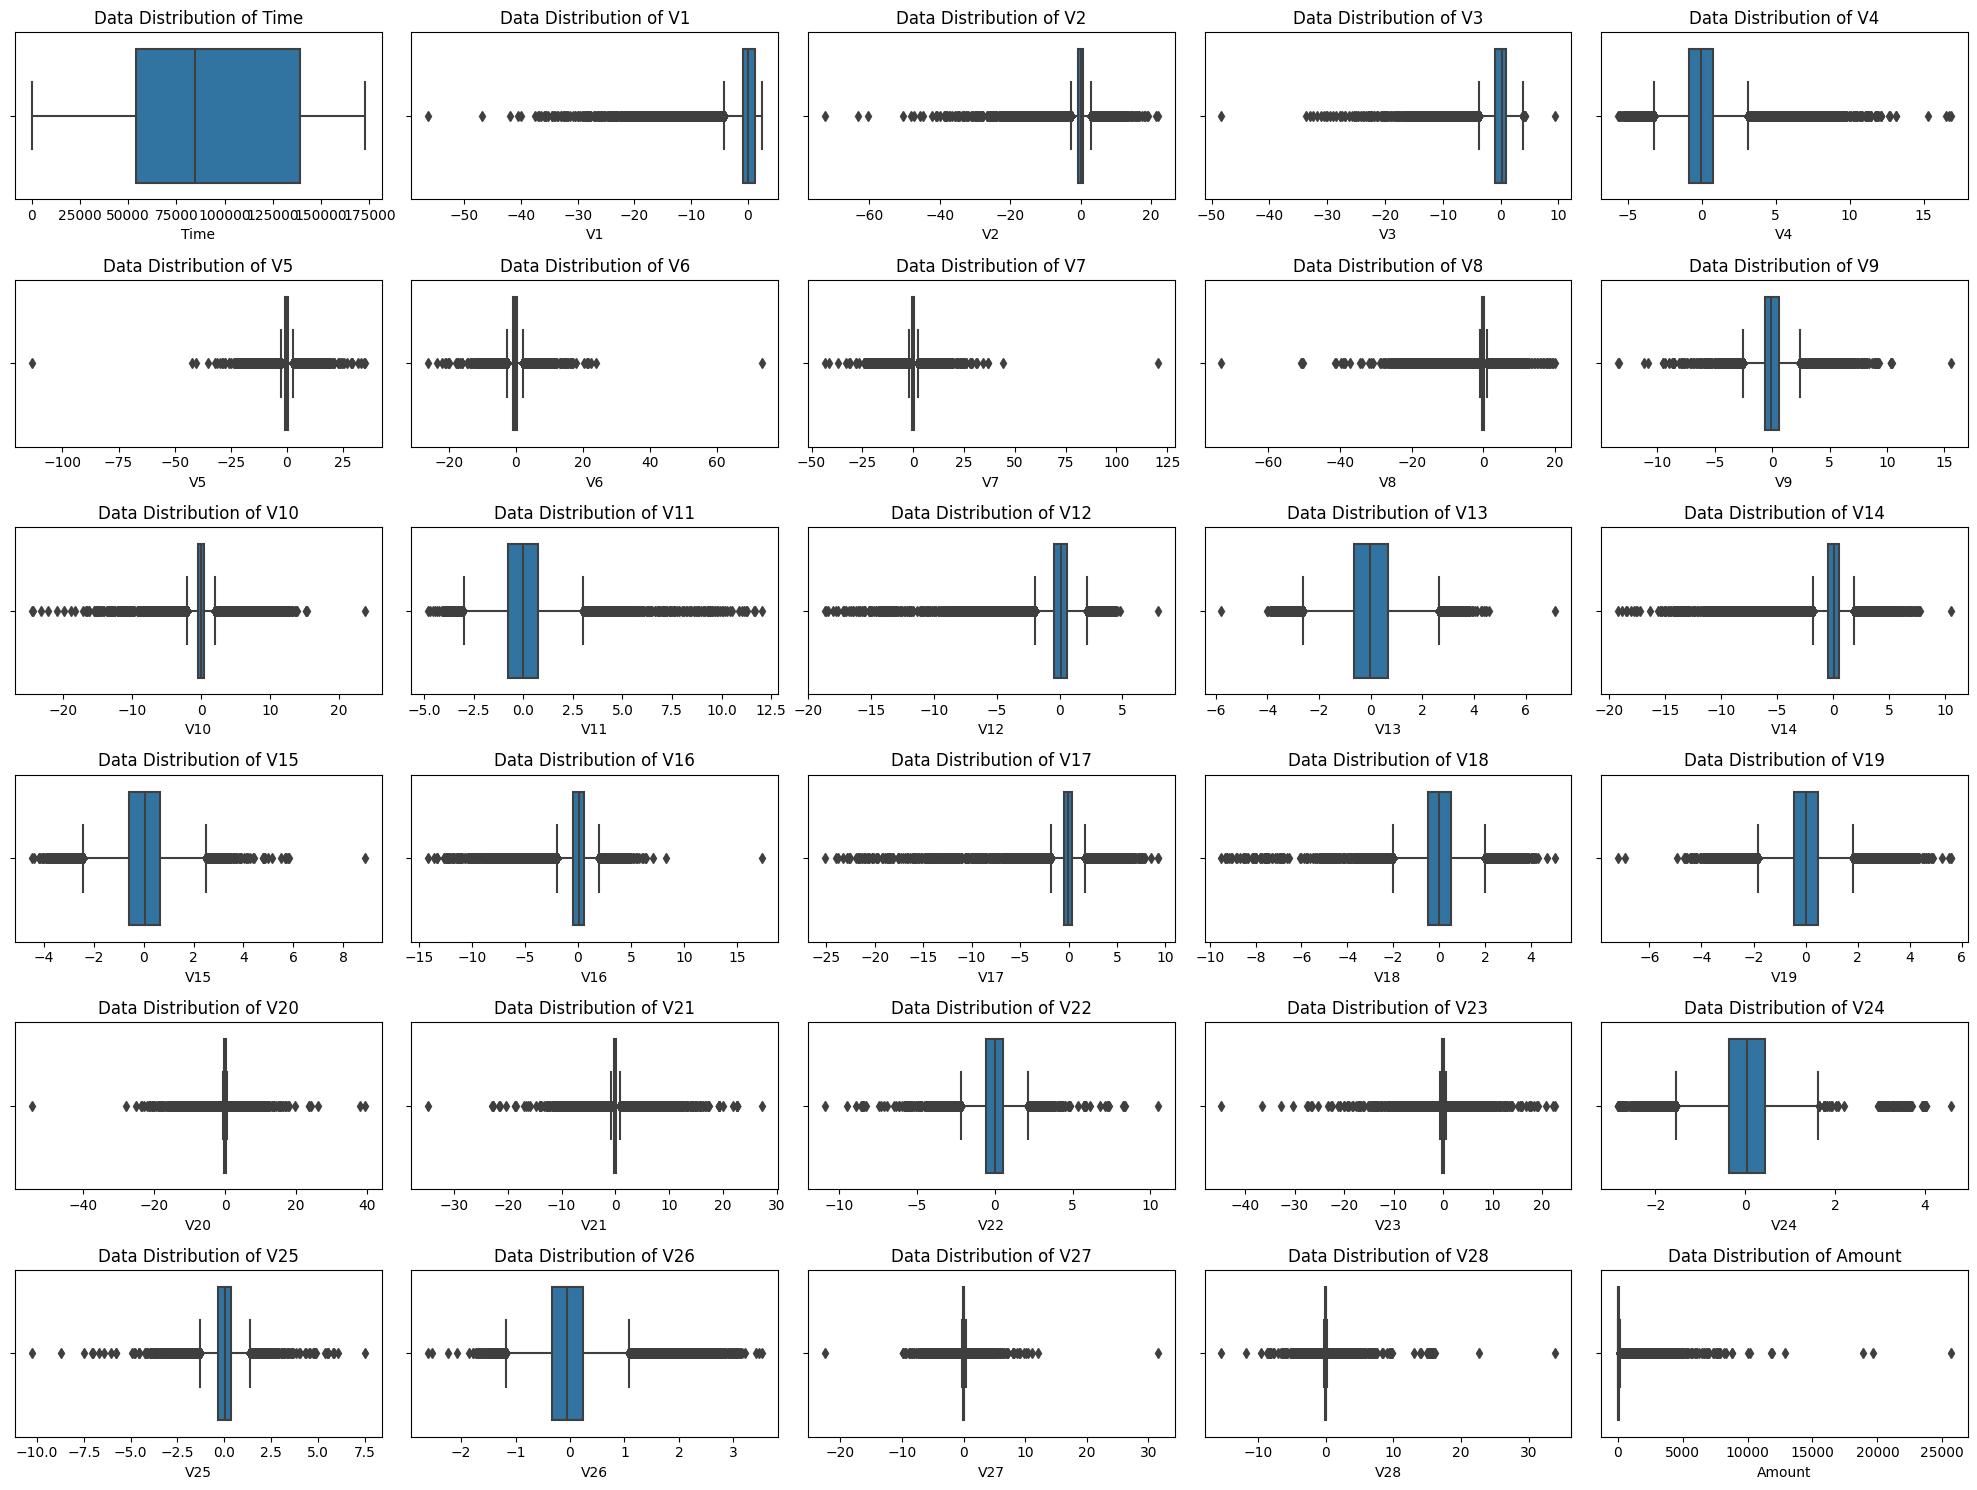

In [29]:
plt.figure(figsize=(20,15))
plotnumber = 1 

for i in df_feature:
    plt.subplot(6,5,plotnumber)

    sns.boxplot(data = df_feature, x = i)

    plt.xlabel(i)
    plt.title(f"Data Distribution of {i}")
    plotnumber += 1

plt.tight_layout()

# **3. Define X and y**

In [34]:
X = df.drop(columns = ["Time", "Class"])
y = df["Class"]

# **4. Data Splitting**

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 0,
                                                    stratify = y)

In [37]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
277710,-0.672422,1.064426,0.169425,-0.956318,1.592661,-1.022882,1.727472,-0.380117,-0.892937,-0.968525,...,-0.026454,0.091072,0.215606,-0.686870,-0.681042,1.312598,0.001208,-0.036280,0.026863,14.90
149099,1.289019,-1.399134,-0.336253,0.847270,-0.756212,0.621076,-0.459826,0.085696,2.769293,-0.819364,...,0.438905,-0.103316,-0.434800,0.059417,0.651539,-0.398947,-0.988587,-0.005283,0.020687,327.00
1862,-1.220437,1.400026,1.220500,-0.782538,-0.229006,-0.938550,0.727396,-0.000388,0.628770,0.268782,...,0.374153,-0.288077,-0.475916,-0.042510,0.388083,-0.073832,0.307998,0.615725,0.363067,5.00
274455,2.266021,-1.080966,-1.969647,-2.859968,-0.300653,-0.857595,-0.326369,-0.402087,1.019874,-0.467265,...,-0.468394,-0.059112,0.668358,-0.130834,0.153513,0.569352,-0.494313,0.060826,-0.048458,22.69
185369,-4.261556,-3.941993,-0.789632,-2.606388,2.822660,2.728412,-0.168965,1.592447,0.250990,-2.077295,...,1.886623,0.367567,-1.081691,0.947858,0.667717,0.596356,0.269440,-0.024696,-0.404474,489.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200507,2.071334,0.006032,-1.336165,0.342543,0.044196,-1.241024,0.253812,-0.386354,0.573210,0.002067,...,-0.239592,0.248023,0.901384,-0.003717,-0.041591,0.268819,-0.101679,-0.015239,-0.059631,1.00
199065,-1.255550,0.691714,3.132609,4.721388,-0.936039,3.692730,-0.999106,1.348502,0.012867,0.986732,...,0.087011,0.118161,0.995268,-0.112897,-1.039259,-0.107631,0.744737,0.107086,-0.164313,103.34
43255,-0.812499,1.065071,1.364722,-0.318808,0.510890,-0.164293,0.896121,-1.281639,-0.350974,0.475619,...,-0.176492,0.813369,0.076238,-0.113654,0.238047,-0.126026,0.343813,-0.693967,-0.399945,9.99
68555,-1.662773,-0.163957,0.479026,0.381733,1.778282,4.082919,-0.866625,1.646876,-0.331704,-0.421486,...,0.725476,0.260894,0.274703,-0.064861,1.018496,0.579327,-0.038019,0.228085,-0.023906,125.00


In [38]:
y_train

277710    0
149099    0
1862      0
274455    0
185369    0
         ..
200507    0
199065    0
43255     0
68555     0
2621      0
Name: Class, Length: 226980, dtype: int64

In [41]:
X.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

# **5. Preprocessing**

In [44]:
# column transformer
transformer = ColumnTransformer(
    [
        ("robust_scaler", RobustScaler(), ["V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11",
       "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20", "V21",
       "V22", "V23", "V24", "V25", "V26", "V27", "V28", "Amount"]),
    ], remainder = "passthrough"
)

In [45]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('robust_scaler', RobustScaler(),
                                 ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7',
                                  'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
                                  'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
                                  'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
                                  'V27', 'V28', 'Amount'])])

In [46]:
transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('robust_scaler', RobustScaler(),
                                 ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7',
                                  'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
                                  'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
                                  'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
                                  'V27', 'V28', 'Amount'])])

# **6. Cross Validation**

In [47]:
# define algo
logreg = LogisticRegression(random_state = 0)
knn = KNeighborsClassifier()
dectree = DecisionTreeClassifier()

In [48]:
list_algo = [logreg, knn, dectree]
list_all_acc = []
list_mean_acc = []
list_std_acc = []

for algo in list_algo:
    model = algo

    # pipeline
    pipe_prep_model = Pipeline([
        ("preprocessing", transformer),
        ("modeling", model),
    ])

    # cross validation
    cross_val = cross_val_score(estimator = pipe_prep_model,    
                                X =  X_train,
                                y = y_train,
                                cv = 5,                      
                                scoring = "recall") 
    
    # accuracy 
    list_all_acc.append(cross_val.round(2))
    list_mean_acc.append(cross_val.mean())
    list_std_acc.append(cross_val.std())

In [49]:
df_recall = pd.DataFrame()
df_recall["algo"] = list_algo
df_recall["all_score"] = list_all_acc
df_recall["mean_recall"] = list_mean_acc
df_recall["std_score"] = list_std_acc

df_recall

,algo,all_score,mean_recall,std_score
0,LogisticRegression(random_state=0),"[0.67, 0.55, 0.61, 0.55, 0.53]",0.579509,0.050775
1,KNeighborsClassifier(),"[0.72, 0.57, 0.74, 0.78, 0.72]",0.706035,0.069289
2,DecisionTreeClassifier(),"[0.76, 0.69, 0.78, 0.74, 0.74]",0.740667,0.027980


**Insight:**

The best model is DecisionTreeClassifier with a recall score of 0.74

# **7. Hyperparameter Tuning**

In [50]:
# define algo
dectree = DecisionTreeClassifier()

# pipeline untuk preprocessing dan modeling
pipe_prep_model = Pipeline([
                            ("preprocessing", transformer),
                            ("modeling", dectree)
                            ])

# hyperparam
hyperparam = {
            "modeling__max_depth": range(2, 50, 1),
            "modeling__min_samples_split": range(2, 50, 1),
            "modeling__min_samples_leaf": range(2, 50, 2)
            }

# opsi lainnya -> randomized
randomsearch = RandomizedSearchCV(
                        estimator= pipe_prep_model,
                        param_distributions = hyperparam,
                        cv = 5,
                        n_jobs = -1,
                        n_iter = 50,
                        scoring= "recall"
                        )

In [51]:
randomsearch

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('robust_scaler',
                                                                               RobustScaler(),
                                                                               ['V1',
                                                                                'V2',
                                                                                'V3',
                                                                                'V4',
                                                                                'V5',
                                                                                'V6',
                                                                                'V7',
                                                                                'V8',
                                                                                'V9',
                                                                                'V10',
                                                                                'V11',
                                                                                'V12',
                                                                                'V13',
                                                                                'V14',
                                                                                'V15',
                                                                                'V16',
                                                                                'V17',
                                                                                'V18',
                                                                                'V19',
                                                                                'V20',
                                                                                'V21',
                                                                                'V22',
                                                                                'V23',
                                                                                'V24',
                                                                                'V25',
                                                                                'V26',
                                                                                'V27',
                                                                                'V28',
                                                                                'Amount'])])),
                                             ('modeling',
                                              DecisionTreeClassifier())]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'modeling__max_depth': range(2, 50),
                                        'modeling__min_samples_leaf': range(2, 50, 2),
                                        'modeling__min_samples_split': range(2, 50)},
                   scoring='recall')

In [52]:
randomsearch.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('robust_scaler',
                                                                               RobustScaler(),
                                                                               ['V1',
                                                                                'V2',
                                                                                'V3',
                                                                                'V4',
                                                                                'V5',
                                                                                'V6',
                                                                                'V7',
                                                                                'V8',
                                                                                'V9',
                                                                                'V10',
                                                                                'V11',
                                                                                'V12',
                                                                                'V13',
                                                                                'V14',
                                                                                'V15',
                                                                                'V16',
                                                                                'V17',
                                                                                'V18',
                                                                                'V19',
                                                                                'V20',
                                                                                'V21',
                                                                                'V22',
                                                                                'V23',
                                                                                'V24',
                                                                                'V25',
                                                                                'V26',
                                                                                'V27',
                                                                                'V28',
                                                                                'Amount'])])),
                                             ('modeling',
                                              DecisionTreeClassifier())]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'modeling__max_depth': range(2, 50),
                                        'modeling__min_samples_leaf': range(2, 50, 2),
                                        'modeling__min_samples_split': range(2, 50)},
                   scoring='recall')

In [ ]:
# Imbalanced
df.value_counts("stroke")

stroke
0    4860
1     249
Name: count, dtype: int64

In [53]:
randomsearch.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robust_scaler',
                                                  RobustScaler(),
                                                  ['V1', 'V2', 'V3', 'V4', 'V5',
                                                   'V6', 'V7', 'V8', 'V9',
                                                   'V10', 'V11', 'V12', 'V13',
                                                   'V14', 'V15', 'V16', 'V17',
                                                   'V18', 'V19', 'V20', 'V21',
                                                   'V22', 'V23', 'V24', 'V25',
                                                   'V26', 'V27', 'V28',
                                                   'Amount'])])),
                ('modeling',
                 DecisionTreeClassifier(max_depth=46, min_samples_leaf=28,
                                        min_samples_split=16))])

**Insight:**

Based on the tuning results, the best model is the Decision Tree Classifier with a maximum depth of 46, minimum samples per leaf of 28, and minimum samples per split of 16.

In [54]:
randomsearch.best_params_

{'modeling__min_samples_split': 16,
 'modeling__min_samples_leaf': 28,
 'modeling__max_depth': 46}

In [55]:
randomsearch.best_score_

0.7486666666666667

# **8. Predict to Test Set**

**Before Tuning**

In [56]:
# define model 
model = dectree

# pipeline
pipe_prep_model = Pipeline(
    [("preprocessing", transformer),
     ("modeling", model)]
)

# fitting 
pipe_prep_model.fit(X_train, y_train)

# predict
y_pred_before = pipe_prep_model.predict(X_test)

# recall score 
recall_score(y_test, y_pred_before)

0.7684210526315789

**After Tuning**

In [58]:
# define model 
model = randomsearch.best_estimator_

# fitting 
model.fit(X_train, y_train)

# predict
y_pred_after = model.predict(X_test)

# recall score
recall_score(y_test, y_pred_after)

0.8315789473684211

**Insight:**

Before tuning, the recall value was 0.76, and after tuning, it increased to 0.83. This improvement indicates that the model's ability to correctly identify positive instances has enhanced significantly following the tuning process.

# **9. Confusion Metrics**

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [60]:
# confusion metrics before tuning
cm_before = confusion_matrix(y_test, y_pred_before)
cm_before

array([[56636,    15],
       [   22,    73]])

In [61]:
# confusion metrics after tuning
cm_after = confusion_matrix(y_test, y_pred_after)
cm_after

array([[56634,    17],
       [   16,    79]])

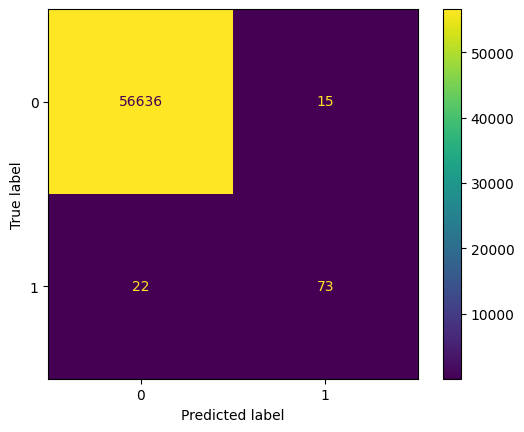

In [62]:
# confusion metrics before tuning
disp_b = ConfusionMatrixDisplay(confusion_matrix = cm_before)

disp_b.plot()

Total loss before Tuning:
- FP = 15 x 10 = 150
- FN = 22 x 100 = 2200
- Total = 2350

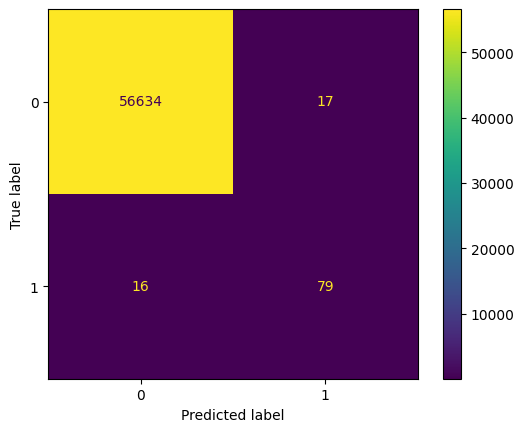

In [63]:
# confusion metrics after tuning
disp_a = ConfusionMatrixDisplay(confusion_matrix = cm_after)

disp_a.plot()

Total loss after Tuning:
- FP = 17 x 10 = 170
- FN = 16 x 100 = 1600
- Total = 1770

**Conclusion**

Before tuning, the number of False Negatives was 22, and after tuning, the number of False Negatives decreased to 16.

Therefore, it can be concluded that the tuned model can reduce the number of False Negatives (FP) or can be said to minimize the potential losses to the company due to fraud.

Based on the modeling conducted before tuning, the costs incurred by the company are:

- FN = 22 x 100 million = 2,200,000,000
- FP = 15 x 10 million = 150,000,000 Therefore, the total overall cost is: 2,350,000,000

Based on the modeling conducted after tuning, the costs incurred by the company are:

- FN = 16 x 100 million = 1,600,000,000
- FP = 17 x 10 million = 170,000,000 Therefore, the total overall cost is: 1,770,000,000

Therefore, using the tuned model to detect fraud transactions because it has a lower risk of loss.